# Data Science and Big Data Project 2: Adding value with ML
## Final Deliverable
### Team T05 

Miloy Ajmera (majmera@andrew.cmu.edu), Samridhi Kochar (skochar@andrew.cmu.edu) / Data Science and Big Data, Spring 2023

##### *Import* Python Libraries

In [ ]:
import pandas as pd
import numpy as np 
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

##### Import the DataSet into Pandas Library

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (1).csv


In [ ]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df['numerical_diagnosis'] = df['diagnosis'].replace(['M', 'B'], [1, 0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##### Basic EDA


# Get the total count of Malignant (cancerous) or Benign (non cancerous).

In [ ]:
alt.Chart(df).mark_bar().encode(
    x=alt.Y('diagnosis:N', axis=alt.Axis(title='Diagnosis')),
    y=alt.X('count(diagnosis):Q', axis=alt.Axis(title='Count of Labels')),
    color=alt.Color('diagnosis:N', legend=None),
    tooltip=[alt.Tooltip('count(diagnosis)', title='Count')]
).properties(
    width=300, height=400
)


alt.Chart(...)

# Analyze the Correlation between the features 

In [ ]:
corr = df.corr()
alt.Chart(corr.unstack().reset_index(name='value')).mark_rect().encode(
    alt.X('level_0:O', title=None),
    alt.Y('level_1:O', title=None),
    alt.Color('value:Q', scale=alt.Scale(scheme='redyellowblue'))
).properties(
    width=800, height=800
    )


<ipython-input-42-130440b3a178>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


alt.Chart(...)

# Get the correlation of each feature with the numerical_diagnosis column

In [ ]:
# Get the correlation of each feature with the numerical_diagnosis column
corr_list = corr['numerical_diagnosis'].sort_values(ascending=False)
print(corr_list)

numerical_diagnosis        1.000000
concave_points_worst       0.793566
perimeter_worst            0.782914
concave_points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave_points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

# Take the top 15 features and understand the correlation with the 'Diagnosis' column

In [ ]:
# take the top 15
corr_top_15 = corr_list[1:16].index.tolist()
corr_top_15

['concave_points_worst',
 'perimeter_worst',
 'concave_points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'concavity_worst',
 'compactness_mean',
 'compactness_worst',
 'radius_se',
 'perimeter_se',
 'area_se']

In [ ]:
df_corr_top_15 = df[corr_list[0:16].index.tolist()]
df_corr_top_15

,numerical_diagnosis,concave_points_worst,perimeter_worst,concave_points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se
0,1,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589,153.40
1,1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0.07864,0.18660,0.5435,3.398,74.08
2,1,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0.15990,0.42450,0.7456,4.585,94.03
3,1,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0.28390,0.86630,0.4956,3.445,27.23
4,1,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0.13280,0.20500,0.7572,5.438,94.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0.11590,0.21130,1.1760,7.673,158.70
565,1,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0.10340,0.19220,0.7655,5.203,99.04
566,1,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0.10230,0.30940,0.4564,3.425,48.55
567,1,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,0.9387,0.27700,0.86810,0.7260,5.772,86.22


# Create a correlation matrix with the top 15 highly correlated features

In [ ]:
corr = df_corr_top_15.corr()
alt.Chart(corr.unstack().reset_index(name='value')).mark_rect().encode(
    alt.X('level_0:O', title=None),
    alt.Y('level_1:O', title=None),
    alt.Color('value:Q', scale=alt.Scale(scheme='redyellowblue'))
).properties(
    width=600, height=600
    )

alt.Chart(...)

# Plot a histogram of the top 15 correlated variables against the 'diagnosis' column

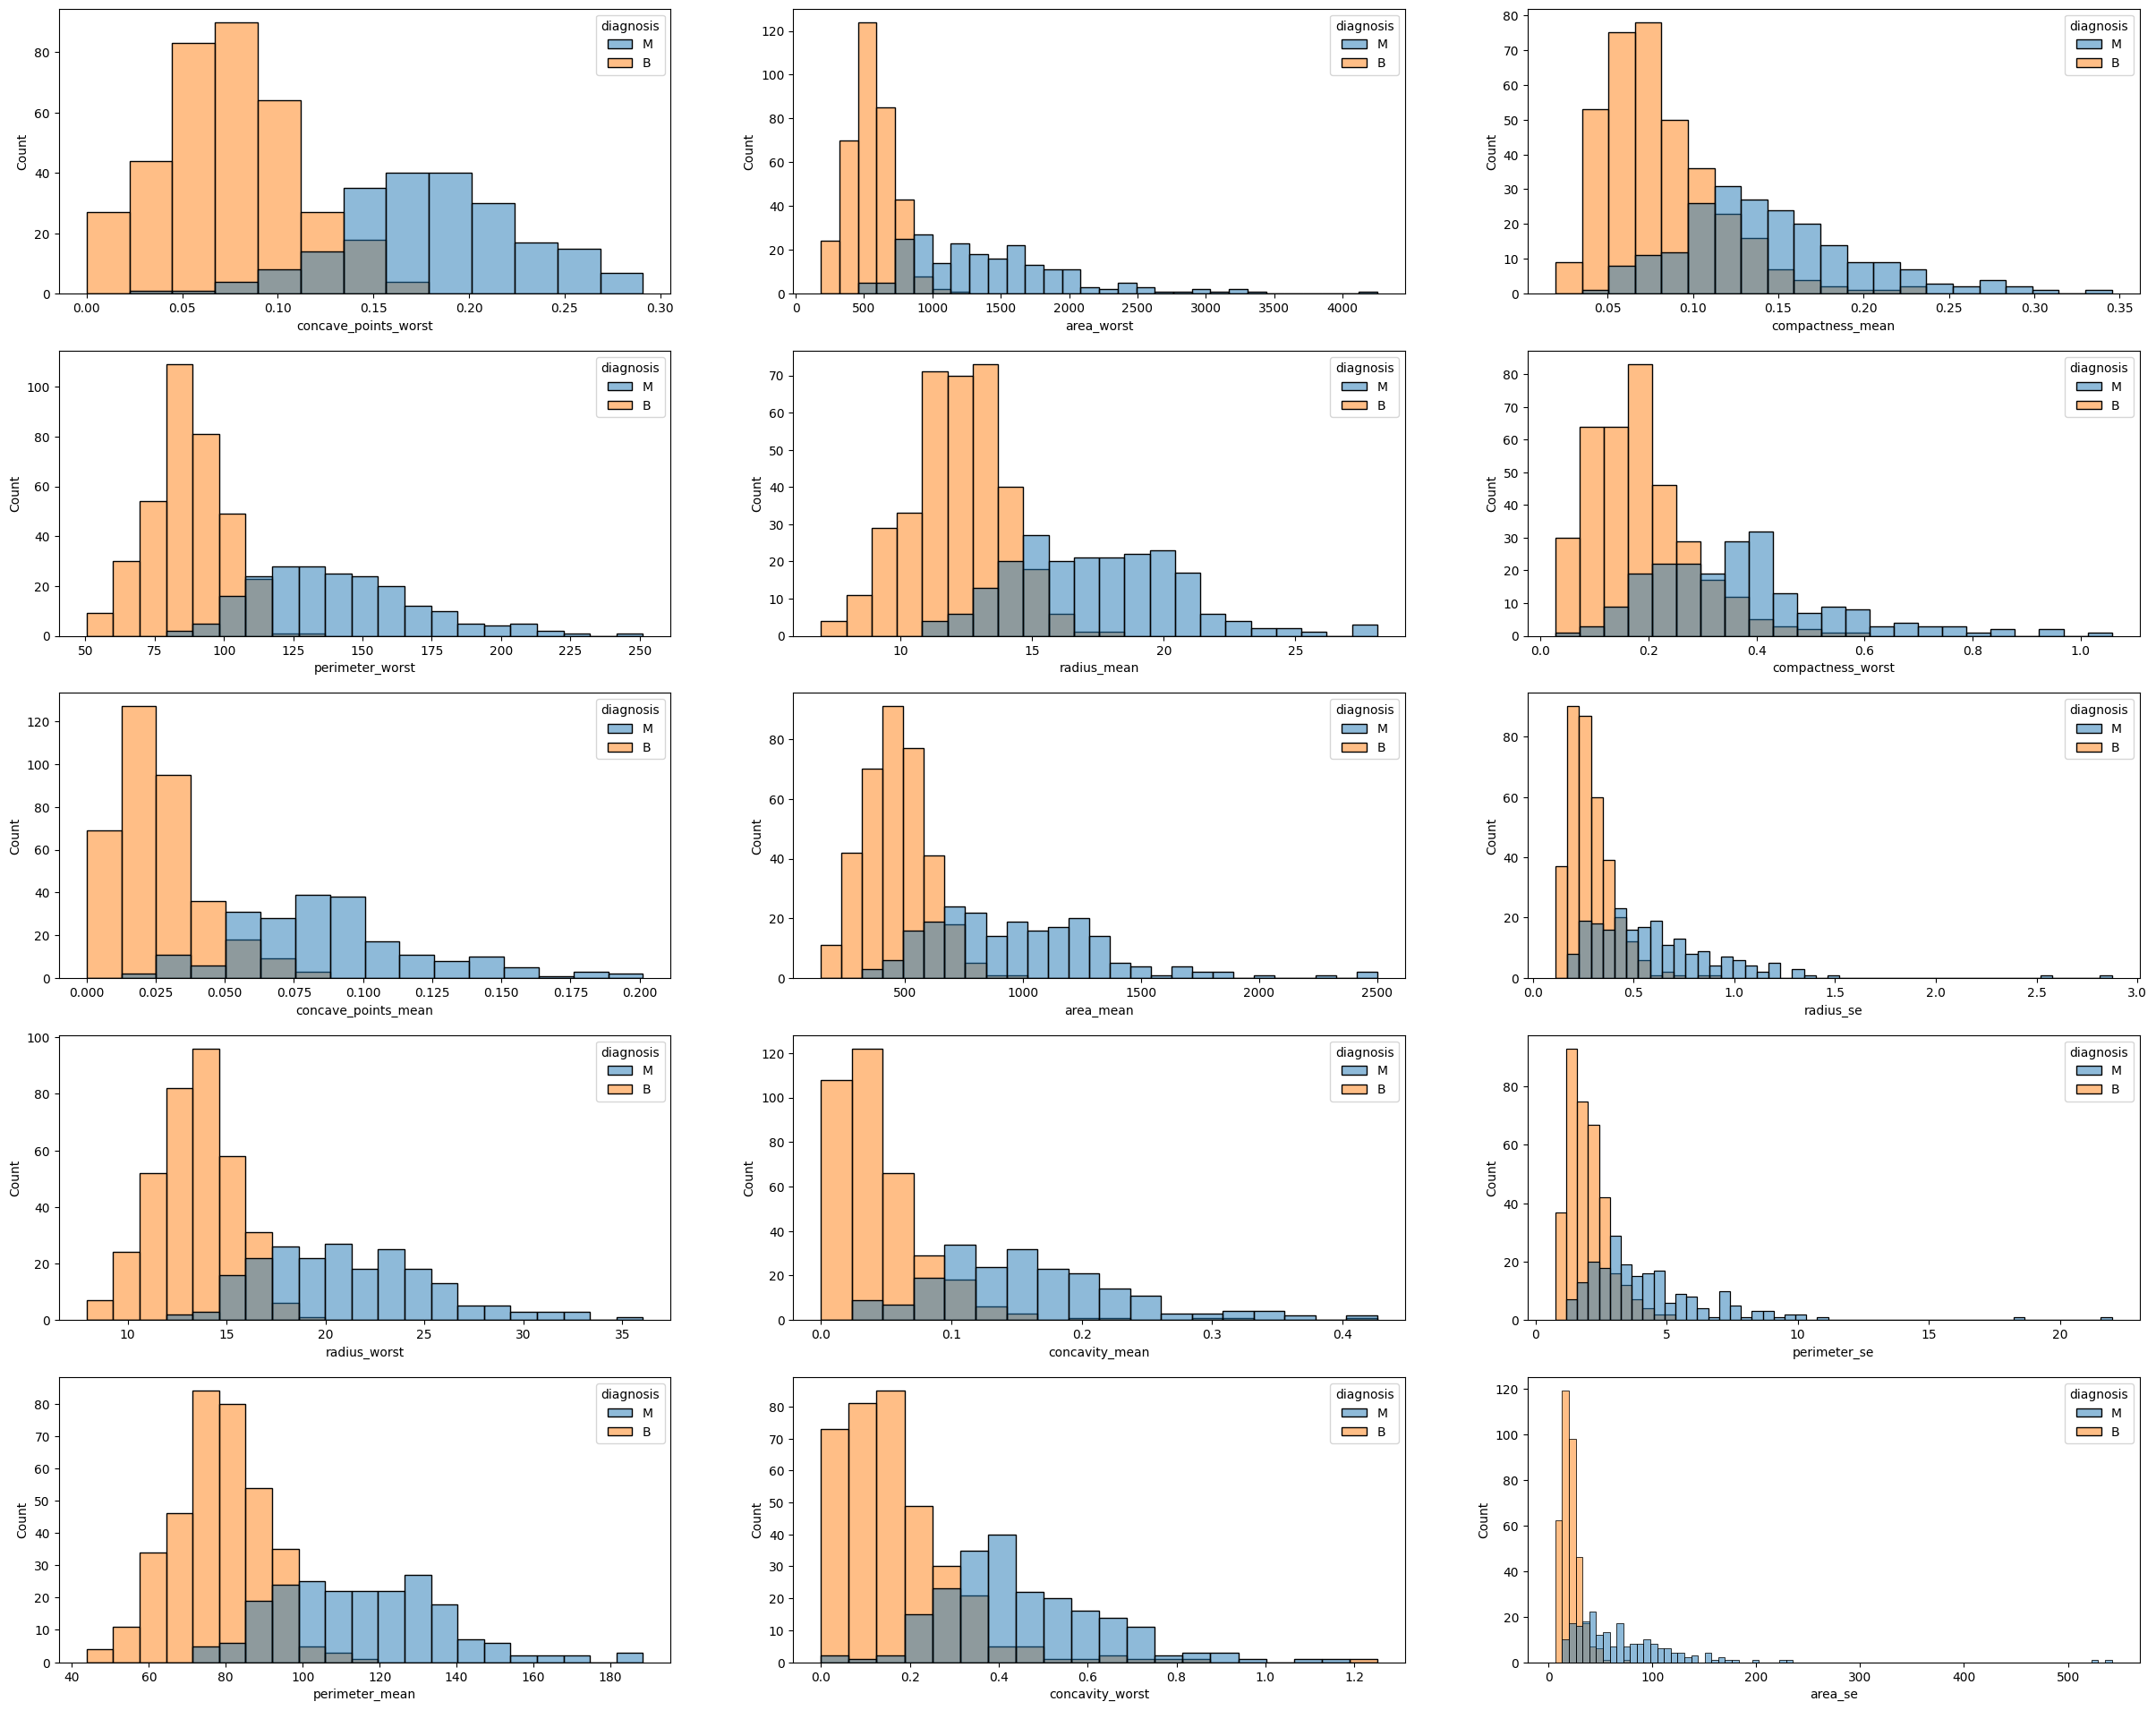

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30, 24))

for i, variable in enumerate(corr_top_15):
    row = i % 5
    col = i // 5
    sns.histplot(data=df, x=variable, hue='diagnosis', ax=axs[row, col])

plt.show()

### Preprocessing & Splitting of Data

In [ ]:
X = df.drop(['id','diagnosis', 'numerical_diagnosis'],axis=1)
y = df['numerical_diagnosis']

### Apply SMOTE to balance the observations, Use cross-validation strategy - RepeatedStratifiedKFold


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Apply SMOTE to the data to balance the observations
sm = SMOTE(random_state=42)
X_sampled, y_sampled = sm.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=1)

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)


### Model 1 - Logistic Regression

In [ ]:
# Define the pipeline
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lgr', LogisticRegression())
])


# Evaluate the model using cross-validation
lr_scores = cross_val_score(pipe_lr, X_train, y_train, cv=cv, scoring='accuracy')
print('Average Train set accuracy:', lr_scores.mean())

# Fit the pipeline on the training data
pipe_lr.fit(X_train, y_train)

# Evaluate the pipeline on the test data
lr_test_accuracy = pipe_lr.score(X_test, y_test)
print('Test set accuracy:', lr_test_accuracy)

# Predict the class labels for the test data
y_pred_lr = pipe_lr.predict(X_test)

# Calculate and print the classification report
print(classification_report(y_test, y_pred_lr))

Average Train set accuracy: 0.97022120518688
Test set accuracy: 0.972027972027972
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.96      0.99      0.97        77

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



### Print the confusion matrix

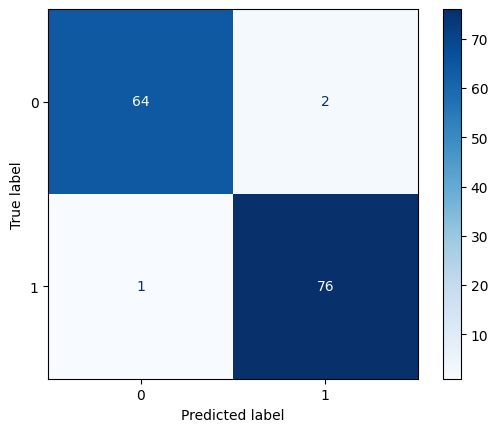

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator( pipe_lr,X_test,y_test,
                                              display_labels=pipe_lr.classes_, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### Hyperparameter Tuning

In [ ]:
# Set hyperparameters to be tuned
params = {
    'lgr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'lgr__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'lgr__max_iter': [100, 500, 1000]
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipe_lr, param_grid=params, cv=5, n_jobs=-1, scoring='recall')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print('Best hyperparameters:', grid_search.best_params_)


Best hyperparameters: {'lgr__C': 100, 'lgr__max_iter': 1000, 'lgr__solver': 'sag'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### After tuning hyperparameters, set new hyperparameters in Logistic Regression

In [ ]:
# After tuning hyperparameters, set new hyperparameters in Logistic Regression

# Define the pipeline
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lgr', LogisticRegression())
])
pipe_lr.set_params(lgr__C=100, lgr__max_iter=1000, lgr__solver='sag')


# Evaluate the model using cross-validation
lr_scores = cross_val_score(pipe_lr, X_train, y_train, cv=cv, scoring='accuracy')
print('Average Train set accuracy:', lr_scores.mean())

# Fit the pipeline on the training data
pipe_lr.fit(X_train, y_train)

# Evaluate the pipeline on the test data
lr_test_accuracy = pipe_lr.score(X_test, y_test)
print('Test set accuracy:', lr_test_accuracy)

# Predict the class labels for the test data
y_pred_lr = pipe_lr.predict(X_test)

# Calculate and print the classification report
print(classification_report(y_test, y_pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Average Train set accuracy: 0.9649733028222731
Test set accuracy: 0.9790209790209791
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.97      0.99      0.98        77

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Model - 2 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the pipeline
pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])


# Evaluate the model using cross-validation
dt_scores = cross_val_score(pipe_dt, X_train, y_train, cv=cv, scoring='accuracy')
print('Average Train set accuracy:', dt_scores.mean())

# Fit the pipeline on the training data
pipe_dt.fit(X_train, y_train)

# Evaluate the pipeline on the test data
dt_test_accuracy = pipe_dt.score(X_test, y_test)
print('Test set accuracy:', dt_test_accuracy)

# Predict the class labels for the test data
y_pred_dt = pipe_dt.predict(X_test)

# Calculate and print the classification report
print(classification_report(y_test, y_pred_dt))

Average Train set accuracy: 0.9358047292143401
Test set accuracy: 0.951048951048951
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        66
           1       0.95      0.96      0.95        77

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



### Print the confusion matrix

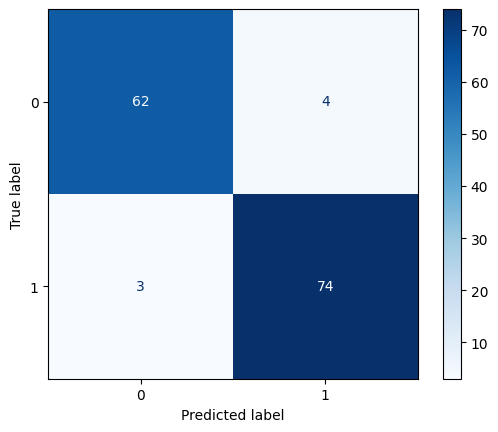

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator( pipe_dt,X_test,y_test,
                                              display_labels=pipe_dt.classes_, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### Model - 3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 10, random_state = 1))
])


# Evaluate the model using cross-validation
rf_scores = cross_val_score(pipe_rf, X_train, y_train, cv=cv, scoring='accuracy')
print('Average Train set accuracy:', rf_scores.mean())

# Fit the pipeline on the training data
pipe_rf.fit(X_train, y_train)

# Evaluate the pipeline on the test data
rf_test_accuracy = pipe_rf.score(X_test, y_test)
print('Test set accuracy:', rf_test_accuracy)

# Predict the class labels for the test data
y_pred_rf = pipe_rf.predict(X_test)

# Calculate and print the classification report
print(classification_report(y_test, y_pred_rf))

Average Train set accuracy: 0.9603203661327231
Test set accuracy: 0.951048951048951
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        66
           1       0.94      0.97      0.96        77

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



### Print the confusion matrix

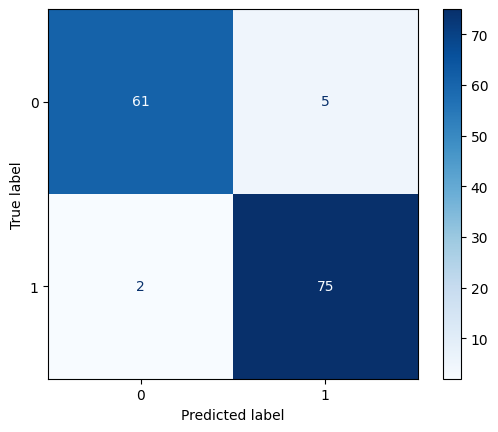

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator( pipe_rf,X_test,y_test,
                                              display_labels=pipe_rf.classes_, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### Model - 4 AdaBoost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Define the pipeline
pipe_abc = Pipeline([
    ('scaler', StandardScaler()),
    ('abc', AdaBoostClassifier(n_estimators=25, learning_rate=1))
])


# Evaluate the model using cross-validation
abc_scores = cross_val_score(pipe_abc, X_train, y_train, cv=cv, scoring='accuracy')
print('Average Train set accuracy:', abc_scores.mean())

# Fit the pipeline on the training data
pipe_abc.fit(X_train, y_train)

# Evaluate the pipeline on the test data
abc_test_accuracy = pipe_abc.score(X_test, y_test)
print('Test set accuracy:', abc_test_accuracy)

# Predict the class labels for the test data
y_pred_abc = pipe_abc.predict(X_test)

# Calculate and print the classification report
print(classification_report(y_test, y_pred_abc))

Average Train set accuracy: 0.959725400457666
Test set accuracy: 0.958041958041958
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        66
           1       0.94      0.99      0.96        77

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



### Print the confusion matrix

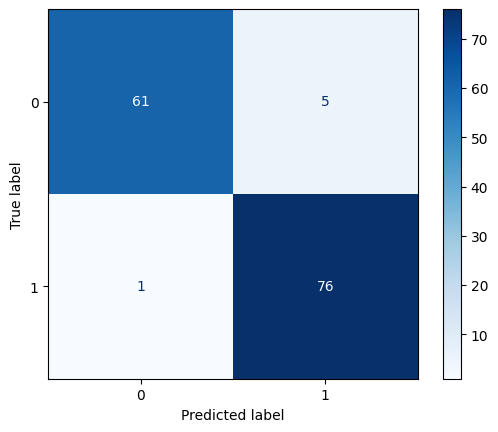

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator( pipe_abc,X_test,y_test,
                                              display_labels=pipe_abc.classes_, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

After comparing metrics of each of the models above, we identified that Logistic Regression gave us the best results for Recall. Hence, we performed grid search to fine tune parameters for Logistic Regression.
Since, it is Breast Cancer detection dataset, we need to make sure that we pursue Highest Recall.
Best hyperparameters: {'lgr__C': 100, 'lgr__max_iter': 1000, 'lgr__solver': 'sag'}
Average Train set accuracy: 0.9655530129672006
Test set accuracy: 0.9790209790209791
                        precision   recall  f1-score  support

                0       0.98      0.97      0.98        66
                1       0.97      0.99      0.98        77
         accuracy                           0.98       143
         macro avg      0.98      0.98      0.98       143
      weighted avg      0.98      0.98      0.98       143



## We have used Logestic Regression Model with Recall as 98%.

Presentation: https://docs.google.com/presentation/d/1MtFLmmOXmFHF3PCUghN7IScv3msKv0HP/edit?usp=share_link&ouid=118016721375968906642&rtpof=true&sd=true


Video: https://drive.google.com/file/d/1ZG53Mclb6tn2Mxa6DVTNCnU0hyWxgFYm/view?usp=share_link
